# GUC K-nearest neighbor Classification

### Mohamed Abdelwahab
### 43-18031

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [2]:
df = pd.read_csv('Classified Data.csv', usecols=[i for i in range(1,12)])
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
scaler = MinMaxScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463


In [6]:
df_feat.shape

(1000, 10)

### Train/Test split, model fit and prediction

In [7]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

[[231  19]
 [ 22 228]]


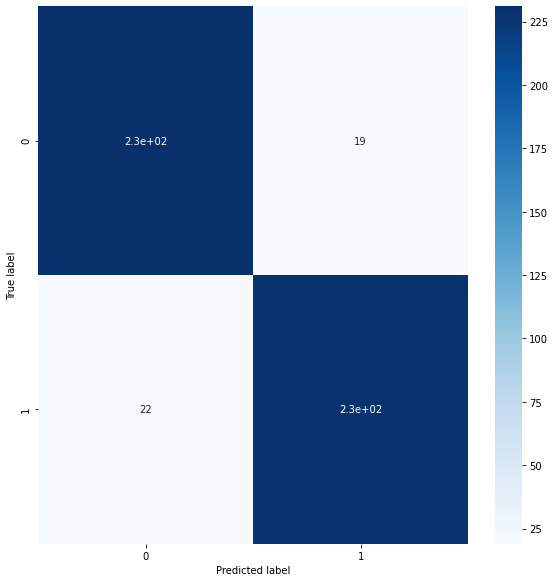

In [11]:
matrix = confusion_matrix(y_test,pred)
print(matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Print Misclassification error rate***

In [12]:
# Misclassification error rate = 1 - Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
Misclassification_error_rate = 1 - accuracy

print('Accuracy tested on X_test = ', accuracy*100 ,'%')
print('Misclassification error rate tested on X_test = ', Misclassification_error_rate*100 ,'%')

Accuracy tested on X_test =  91.8 %
Misclassification error rate tested on X_test =  8.199999999999996 %


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [13]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()


param_grid = {'n_neighbors': np.arange(1, 320)}


knn_gscv = GridSearchCV(knn2, param_grid, cv=3, verbose=0, scoring='accuracy')

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92...
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300, 301, 302, 303, 30

In [14]:
# mean accuracy results using cross validation = 5 and using n_neighbours from 1 to 320
mean_accuracy_score = knn_gscv.cv_results_['mean_test_score']

In [15]:
knn_gscv.best_score_

0.9359834547771926

In [16]:
# mean Misclassification error rate 
mean_Misclassification_error_rate = 1 - knn_gscv.cv_results_['mean_test_score']

Text(0, 0.5, 'mean_Misclassification_error_rate')

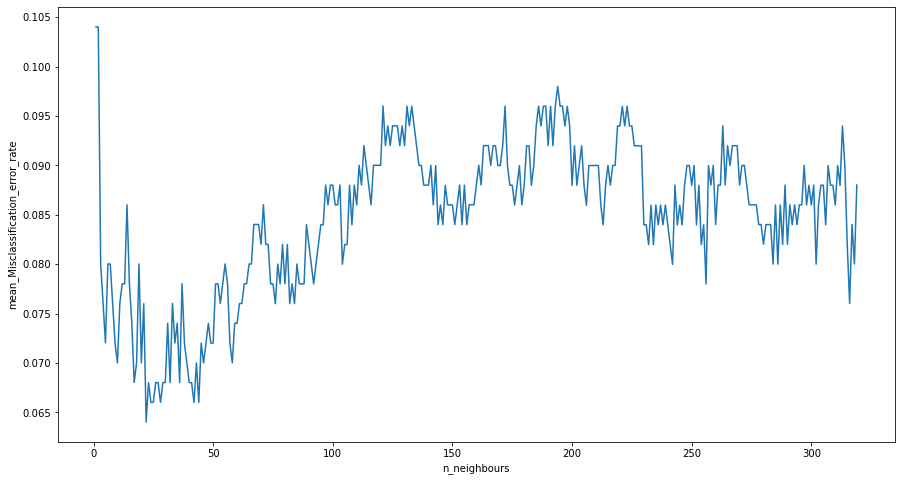

In [17]:
figure = plt.figure(figsize=(15, 8))
plt.plot([i for i in range(1, 320)], mean_Misclassification_error_rate)
plt.xlabel('n_neighbours')
plt.ylabel('mean_Misclassification_error_rate')

In [19]:
# best model parameters
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=22)

In [20]:
best_n = knn_gscv.best_params_['n_neighbors']

In [21]:
best_knn = knn_gscv.best_estimator_

best_pred = best_knn.predict(X_test)

In [22]:
# Misclassification error rate = 1 - Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, best_pred)
Misclassification_error_rate = 1 - accuracy

print('Accuracy tested on X_test = ', accuracy*100 ,'%')
print('Misclassification error rate tested on X_test = ', Misclassification_error_rate*100 ,'%')

Accuracy tested on X_test =  95.39999999999999 %
Misclassification error rate tested on X_test =  4.600000000000004 %


[[239  11]
 [ 12 238]]


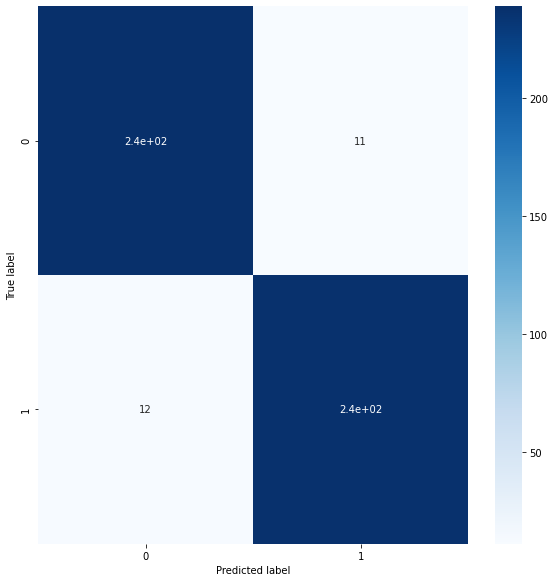

In [23]:
matrix = confusion_matrix(y_test,best_pred)
print(matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
scores = np.zeros((10))
for i in range(1,11):
    c = KNeighborsClassifier(n_neighbors=best_n)
    c.fit(X_train[:i*50], y_train[:i*50])
    pred = c.predict(X_test)
    scores[i-1] = accuracy_score(y_test, pred)
print(scores)

[0.924 0.934 0.938 0.94  0.952 0.956 0.96  0.956 0.954 0.954]


In [25]:
best_sample = scores.argmax() + 1
best_sample

7

In [26]:
c = KNeighborsClassifier(n_neighbors=best_n)
c.fit(X_train[:best_sample*50], y_train[:best_sample*50])
pred = c.predict(X_test)
best_accuracy = accuracy_score(y_test, pred)
best_error = 1 - best_accuracy

print('Accuracy tested on X_test = ', best_accuracy*100 ,'%')
print('Misclassification error rate tested on X_test = ', best_error*100 ,'%')

Accuracy tested on X_test =  96.0 %
Misclassification error rate tested on X_test =  4.0000000000000036 %


[[240  10]
 [ 10 240]]


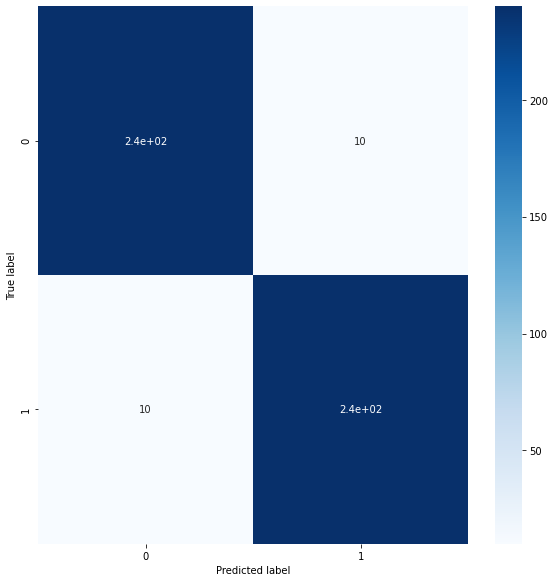

In [27]:
matrix = confusion_matrix(y_test,pred)
print(matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### So, 22 n_neighbours when training with 350 samples gives the best results